In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [7]:
TrainX = pd.read_csv('dengue_features_train.csv')
TrainY = pd.read_csv('dengue_labels_train.csv')
Test = pd.read_csv('dengue_features_test.csv')

In [9]:
TrainY.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [5]:
TrainX.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [11]:
TrainX.shape

(1456, 24)

In [10]:
TrainY.shape

(1456, 4)

In [27]:
TrainX_sj = TrainX[TrainX['city'] == 'sj']
TrainY_sj = TrainY[TrainY['city'] == 'sj']
print(TrainX_sj.shape)
TrainX_sj.head()

(936, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [15]:
TrainX_iq = TrainX[TrainX['city'] != 'sj']
print(TrainX_iq.shape)
TrainX_iq.head()

(520, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0


In [50]:
from datetime import date 
TrainX_sj['week_yr'] = pd.to_datetime(TrainX_sj['year'].astype(str)+' '+TrainX_sj['weekofyear'].astype(str)+' 1',
                                format='%Y %W %w')
TrainX_sj['week_yr'].head()

/Applications/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0   1990-04-30
1   1990-05-07
2   1990-05-14
3   1990-05-21
4   1990-05-28
Name: week_yr, dtype: datetime64[ns]

In [29]:
TrainY_sj['week_yr'] = pd.to_datetime(TrainY_sj['year'].astype(str)+' '+TrainY_sj['weekofyear'].astype(str)+' 1',
                                format='%Y %W %w')
TrainY_sj.head()

/Applications/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,city,year,weekofyear,total_cases,week_yr
0,sj,1990,18,4,1990-04-30
1,sj,1990,19,5,1990-05-07
2,sj,1990,20,4,1990-05-14
3,sj,1990,21,3,1990-05-21
4,sj,1990,22,6,1990-05-28


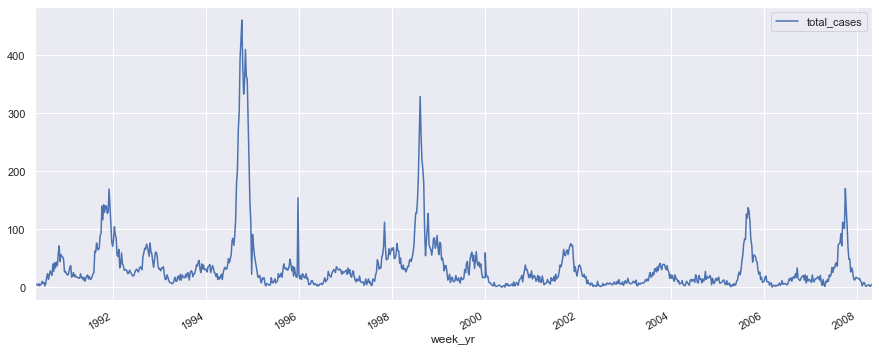

In [67]:

TrainY_sj.plot(x='week_yr',y='total_cases',figsize=(15, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x122c9dcc0>,
      dtype=object)

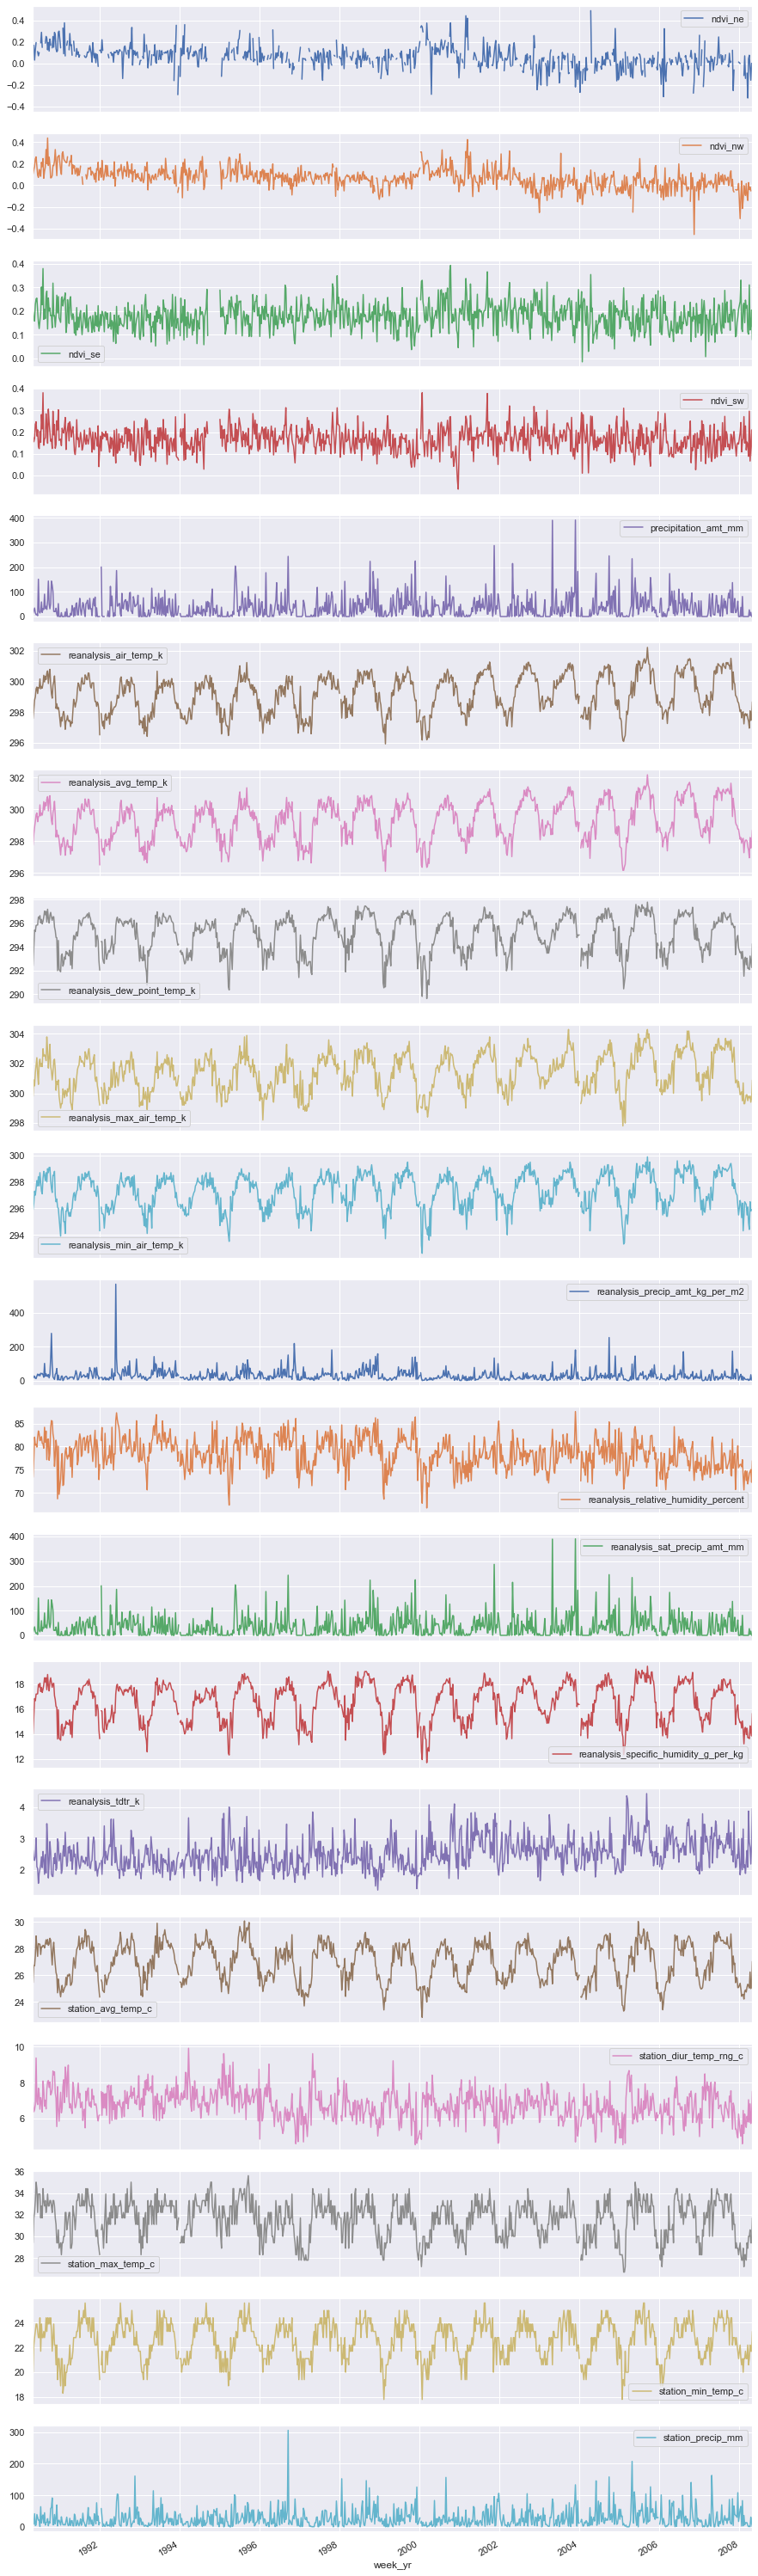

In [55]:
TrainX_sj.iloc[:,3:].plot(subplots=True, figsize=(15,60), x='week_yr',sharex=True)

In [63]:
TrainX_sj_1995 = TrainX_sj[(TrainX_sj.year == 1995) | (TrainX_sj.year == 1994)]
TrainY_sj_1995 = TrainY_sj[(TrainY_sj.year == 1995) | (TrainY_sj.year == 1994)]

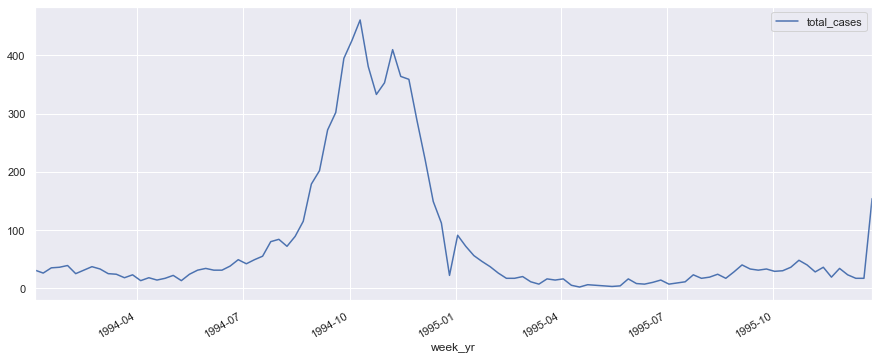

In [68]:
TrainY_sj_1995.plot(x='week_yr',y='total_cases',figsize=(15, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x123f1c518>,
      dtype=object)

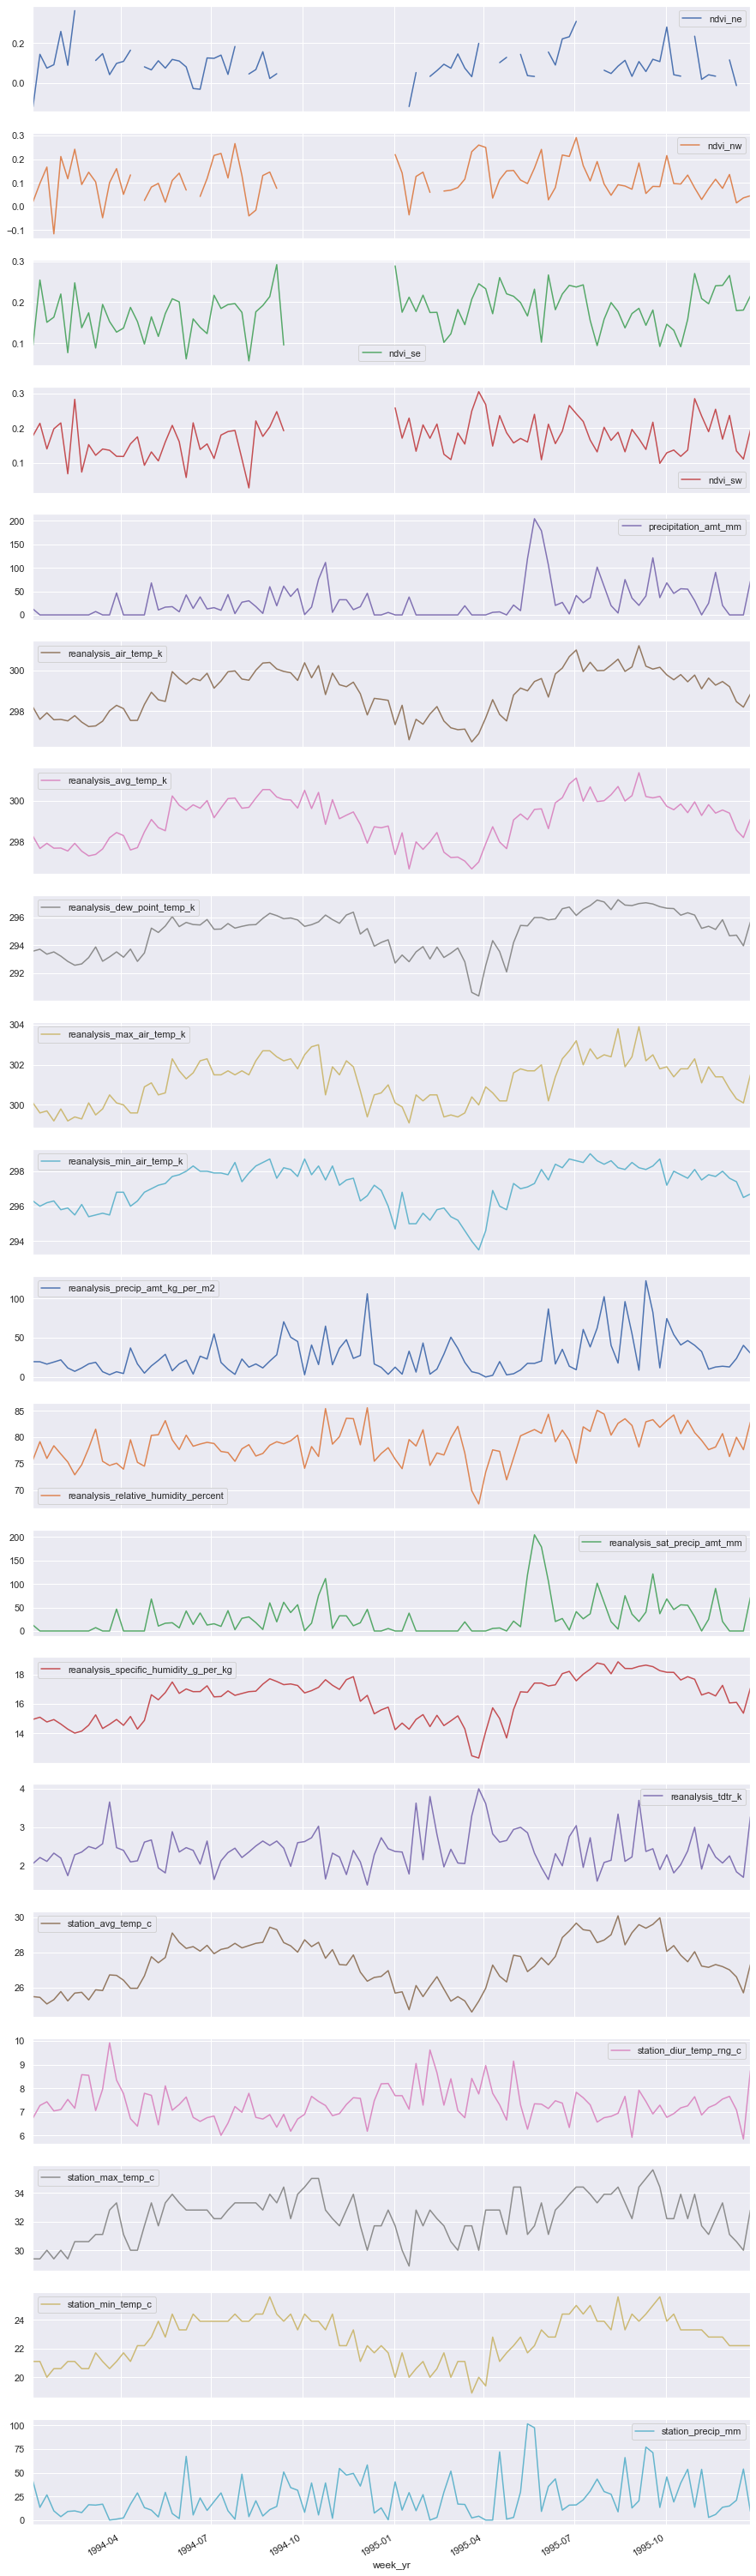

In [65]:
TrainX_sj_1995.iloc[:,3:].plot(subplots=True, figsize=(15,60), x='week_yr',sharex=True)